In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
dataset = pd.read_csv('Data/temp_data-AllYears-Min-Max.csv')
dataset.head()

,Year,Min Avg Temp,Max Avg Temp
0,1850,12.833,16.783
1,1851,13.245,16.831
2,1852,13.231,16.984
3,1853,13.143,16.999
4,1854,12.983,16.775


In [3]:
# Let X be world population and y be global average yearly temperature, then Reshape X and y
X = dataset['Min Avg Temp'].values.reshape(-1,1)
y = dataset['Max Avg Temp'].values.reshape(-1,1)

In [4]:
# split the train - test data to be 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [5]:
# Train the algorithm using a linear regression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
#To retrieve the intercept:
print("The y intercept is:  ", regressor.intercept_)
#For retrieving the slope:
print("The slope is:  ", regressor.coef_)

The y intercept is:   [8.25909715]
The slope is:   [[0.64427629]]


In [7]:
# Make predictions
y_pred = regressor.predict(X_test)

In [8]:
# Compare actual to predicted values
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten(), "Error": y_pred.flatten() - y_test.flatten()})
# pd.DataFrame({"Predicted": predictions, "Actual": y, "Error": predictions - y})[["Predicted", "Actual", "Error"]]
df

,Actual,Predicted,Error
0,17.503,17.354345,-0.148655
1,16.972,17.023832,0.051832
2,16.950,16.971001,0.021001
3,16.651,16.766766,0.115766
4,17.218,17.235799,0.017799
5,16.525,16.606985,0.081985
6,16.478,16.616649,0.138649
7,16.685,16.773208,0.088208
8,17.013,17.071508,0.058508
9,16.431,16.575415,0.144415


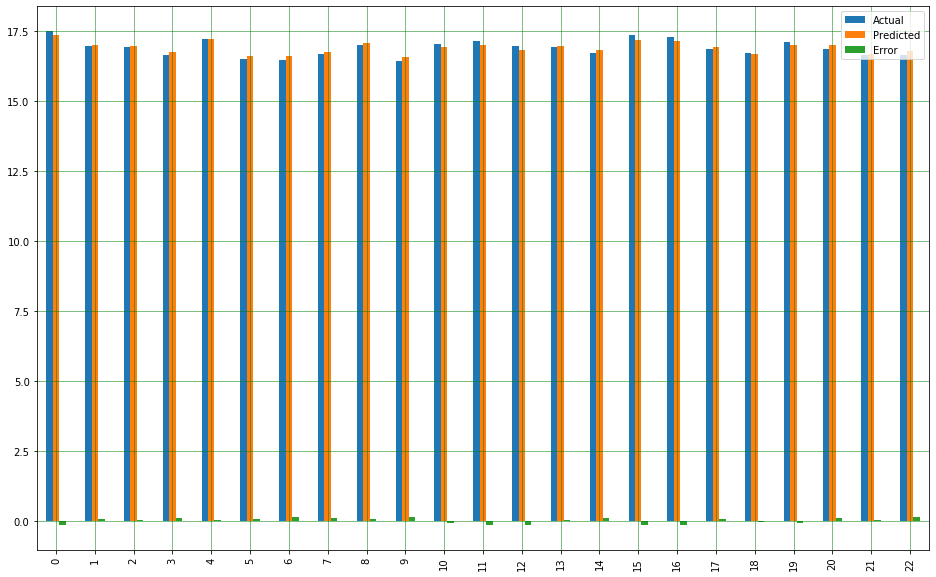

In [9]:
# Create a bar chart to show comparison between actual and predicted
df1 = df.head(23)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

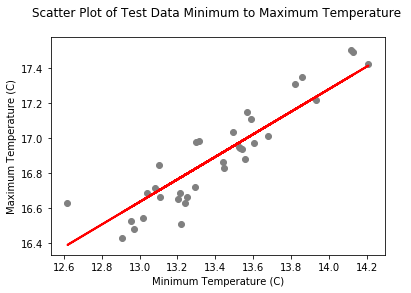

In [21]:
# Plot our straight line with the test data
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel("Minimum Temperature (C)")
plt.ylabel("Maximum Temperature (C)")
plt.title("Scatter Plot of Test Data Minimum to Maximum Temperature \n")
fig1 = plt.gcf()
fig1.savefig('images/MinMax_Temp_scatter_test.png', bbox_inches='tight')

In [11]:
# Calculate margin or error
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.1034768180141417
Mean Squared Error: 0.01437294658402776
Root Mean Squared Error: 0.1198872244404205


In [12]:
x_min = X.min()
x_max = X.max()
print("Min/Max X values (Year)", x_min, x_max)

Min/Max X values (Year) 12.475 14.255


In [13]:
# Get y (temperature min and max actuals)
y_min_actual = y.min()
y_max_actual = y.max()
print("Min/Max Y values (Temperature)", y_min_actual, y_max_actual)

Min/Max Y values (Temperature) 16.430999999999994 17.611


In [16]:
# The y intercept is:   [8.25909715]
# The slope is:   [[0.64427629]]
y_min = 8.25909715 + 0.64427629 * x_min
y_max = 8.25909715 + 0.64427629 * x_max
print(f"Actual Smallest Max Value: {y_min_actual}")
print(f"Calculated Smallest Max Value: {y_min}")
print(f"Actual Largest Max Value: {y_max_actual}")
print(f"Calculated Largest Max Value: {y_max}")

Actual Smallest Max Value: 16.430999999999994
Calculated Smallest Max Value: 16.29644386775
Actual Largest Max Value: 17.611
Calculated Largest Max Value: 17.44325566395


In [17]:
# Predict calculated values
y_min_predicted = regressor.predict([[x_min]])
y_max_predicted = regressor.predict([[x_max]])
print(f"Actual Smallest Max Value: {y_min_actual}")
print(f"Predicted Smallest Max Value: {y_min_predicted}")
print(f"Actual Largest Max Value: {y_max_actual}")
print(f"Predicted Largest Max Value: {y_max_predicted}")

Actual Smallest Max Value: 16.430999999999994
Predicted Smallest Max Value: [[16.29644383]]
Actual Largest Max Value: 17.611
Predicted Largest Max Value: [[17.44325562]]


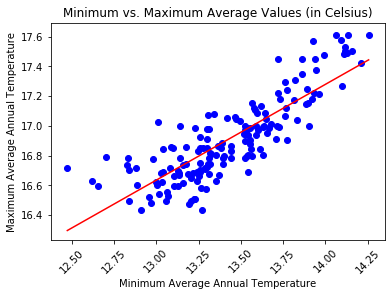

In [23]:
plt.scatter(X, y, c='blue')
plt.plot([x_min, x_max], [y_min, y_max], c='red')
plt.xticks(rotation=45)
plt.xlabel("Minimum Average Annual Temperature")
plt.ylabel("Maximum Average Annual Temperature")
plt.title('Minimum vs. Maximum Average Values (in Celsius)')
fig2 = plt.gcf()
fig2.savefig('images/Min_vs_Max_Temp.png', bbox_inches='tight')